<a href="https://colab.research.google.com/github/somilasthana/MachineLearningSkills/blob/master/Voting_Classifier_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
"""
VotingClassifier combines conceptually different ML classifiers 
1. Using Majority Voting
2. Average predicted probabilities


For example
if the prediction for a given sample is

classifier 1 -> class 1
classifier 2 -> class 1
classifier 3 -> class 2


VotingClassifier(voting='hard') it picks class 1

in case of 
classifier 1 -> class 2
classifier 2 -> class 1

lower class is voted ie class 1
"""

In [0]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [0]:
iris = load_iris()

X, y = iris.data[:, 1:3], iris.target


In [0]:
clf_log = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=42)

In [0]:
clf_rf = RandomForestClassifier(n_estimators=50, random_state=42)

In [0]:
clf_gauss = GaussianNB()

In [0]:
elf = VotingClassifier(estimators=[('lr', clf_log), ('rf', clf_rf), ('gnb', clf_gauss)], voting='hard')

In [0]:
classifier_name = ['Logistic Regression', 'Random Forest', 'naive Bayes', 'VotingEnsemble']
classifier_instance = [clf_log, clf_rf, clf_gauss, elf]

In [11]:
for clf, label in zip(classifier_instance, classifier_name):
  scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
  print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.95 (+/- 0.04) [Logistic Regression]
Accuracy: 0.93 (+/- 0.04) [Random Forest]
Accuracy: 0.91 (+/- 0.04) [naive Bayes]
Accuracy: 0.95 (+/- 0.03) [VotingEnsemble]


In [0]:
# Soft Voting

In [0]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import product
from sklearn.ensemble import VotingClassifier
import numpy as np
import matplotlib.pyplot as plt


In [0]:
X = iris.data[:, [1, 2]]
y = iris.target

In [0]:
clf_dtree = DecisionTreeClassifier(max_depth=4)
clf_knn   = KNeighborsClassifier(n_neighbors=7)
clf_svc   = SVC(gamma='scale', kernel='rbf', probability=True)
eclf      = VotingClassifier(estimators=[('dt', clf_dtree), ('knn', clf_knn), ('svc', clf_svc)], voting='soft', weights=[2, 1, 2])

In [19]:
clf_dtree.fit(X, y)
clf_knn.fit(X, y)
clf_svc.fit(X, y)
eclf.fit(X, y)

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_depth=4,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort=False,
                                                     random_state=None,
                                                     splitter='best')),
         

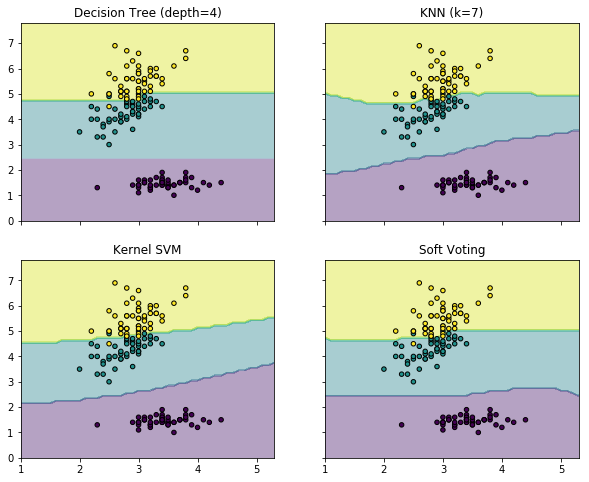

In [26]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, ax = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0,1], [0,1]), [clf_dtree, clf_knn, clf_svc, eclf], ['Decision Tree (depth=4)', 'KNN (k=7)',
                         'Kernel SVM', 'Soft Voting']):
  
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  
  ax[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
  ax[idx[0], idx[1]].scatter(X[:,0], X[:,1], c=y, s=20, edgecolor='k')
  ax[idx[0], idx[1]].set_title(tt)

In [28]:
from sklearn.model_selection import GridSearchCV

params = {'weights': [[2, 1, 2], [1, 1, 1], [2, 1, 1], [1, 2, 1], [1, 1, 2]]}
grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)

grid.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=VotingClassifier(estimators=[('dt',
                                                     DecisionTreeClassifier(class_weight=None,
                                                                            criterion='gini',
                                                                            max_depth=4,
                                                                            max_features=None,
                                                                            max_leaf_nodes=None,
                                                                            min_impurity_decrease=0.0,
                                                                            min_impurity_split=None,
                                                                            min_samples_leaf=1,
                                                                            min_samples_split=2,
                      

In [29]:
best = grid.best_estimator_
best.weights

[1, 1, 2]

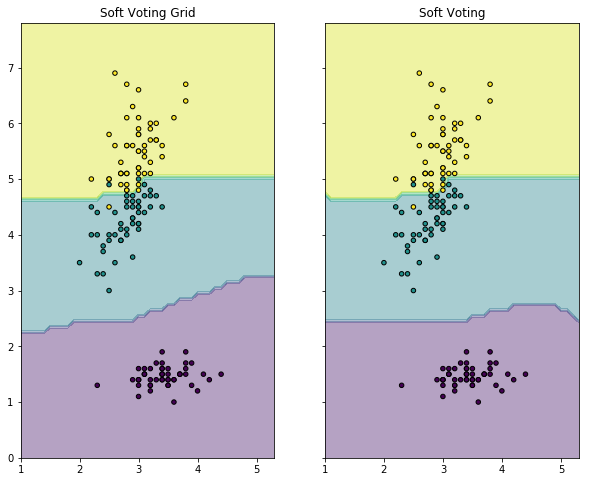

In [36]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(([0], [1]), [best, eclf], ['Soft Voting Grid', 'Soft Voting']):
  
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  
  ax[idx[0]].contourf(xx, yy, Z, alpha=0.4)
  ax[idx[0]].scatter(X[:,0], X[:,1], c=y, s=20, edgecolor='k')
  ax[idx[0]].set_title(tt)

In [0]:
# Voting Regressor
"""
Returns the average predicted value
"""

from sklearn import datasets
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

In [0]:
boston = datasets.load_boston()
X = boston.data
y = boston.target

In [0]:
reg1 = GradientBoostingRegressor(random_state=42, n_estimators=10)
reg2 = RandomForestRegressor(random_state=42, n_estimators=10)
reg3 = LinearRegression()
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])

In [46]:
reg1.fit(X, y)
reg2.fit(X, y)
reg3.fit(X, y)
ereg.fit(X, y)

VotingRegressor(estimators=[('gb',
                             GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                   

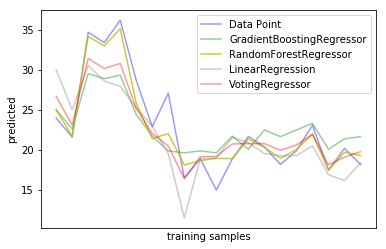

In [67]:
xt = X[:20]
plt.plot(y[:20], 'b', label='Data Point', alpha=0.4)

plt.plot(reg1.predict(xt), 'g', label='GradientBoostingRegressor', alpha=0.4)
plt.plot(reg2.predict(xt), 'y', label='RandomForestRegressor', alpha=0.8)
plt.plot(reg3.predict(xt), 'gray', label='LinearRegression', alpha=0.4)
plt.plot(ereg.predict(xt), 'r', label='VotingRegressor', alpha=0.4)
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")